# Stats701 Homework 8, Winter 2018
### Mengyi Yuan
#### wendymy@umich.edu

### Problem 1: Regular Expression: Warmup
Problem 1 took me 2 hours.

In [1]:
import urllib.request
import re

In [2]:
# 1.1
words = urllib.request.urlopen('http://www.greenteapress.com/thinkpython/code/words.txt').read().decode('ASCII')
word_lst = re.findall("[a-z]+", words)
len(word_lst)

113809

In [3]:
# 1.2
word_lst

['aa',
 'aah',
 'aahed',
 'aahing',
 'aahs',
 'aal',
 'aalii',
 'aaliis',
 'aals',
 'aardvark',
 'aardvarks',
 'aardwolf',
 'aardwolves',
 'aas',
 'aasvogel',
 'aasvogels',
 'aba',
 'abaca',
 'abacas',
 'abaci',
 'aback',
 'abacus',
 'abacuses',
 'abaft',
 'abaka',
 'abakas',
 'abalone',
 'abalones',
 'abamp',
 'abampere',
 'abamperes',
 'abamps',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandonments',
 'abandons',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasement',
 'abasements',
 'abaser',
 'abasers',
 'abases',
 'abash',
 'abashed',
 'abashes',
 'abashing',
 'abasing',
 'abatable',
 'abate',
 'abated',
 'abatement',
 'abatements',
 'abater',
 'abaters',
 'abates',
 'abating',
 'abatis',
 'abatises',
 'abator',
 'abators',
 'abattis',
 'abattises',
 'abattoir',
 'abattoirs',
 'abaxial',
 'abaxile',
 'abbacies',
 'abbacy',
 'abbatial',
 'abbe',
 'abbes',
 'abbess',
 'abbesses',
 'abbey',
 'abbeys',
 'abbot',
 'abbotcies',
 'abbotcy',
 'abbots',
 'abbreviate',
 '

In this word list, there exist many words that don't make sense, for example, "aa" and "aas". Also, for a verb, the list contains all the forms of that verb. The list needs to be cleaned and preprocessed before putting into use. 

In [4]:
# 1.3
word_lst2 = []
for word in word_lst:
    if re.match("[^aeiouy]{4}",word) is not None:
        word_lst2.append(word)
len(word_lst2)    

67

There are 67 words from the list start with exactly four consecutive consonants.

In [5]:
# 1.4
word_lst3 = []
for word in word_lst:
    if len(re.findall("a", word)) >= 4:
        word_lst3.append(word)
len(word_lst3)

50

There are 50 words contain at leat four instances of the letter a. 

In [6]:
# 1.5
word_lst4 = []
for word in word_lst:
    if re.match("^[aeiou][^aeiouy]+[aeiou]$", word):
        word_lst4.append(word)
len(word_lst4)

165

There are 165 words begin and end with a vowel with only consonants in between. 

In [7]:
# 1.6
word_lst5 = []
for word in word_lst:
    if re.findall("^\w{2}", word) == re.findall("\w{2}$", word):
        word_lst5.append(word)
len(word_lst5)

366

There are 366 words start and end with the same two-letter sequence. 

### Problem 2: Exploring Internet Traffic with Regexes
Problem 2 took me 2 hours.

In [8]:
# 2.1
skypeIRC = urllib.request.urlopen("http://umich.edu/~klevin/teaching/Winter2018/STATS701/SkypeIRC.txt").read().decode("UTF-8")
skypeLines = re.findall(".+",skypeIRC)
len(skypeLines)

2263

There are 2263 packets in this file. 

In [9]:
# 2.2
IPadd = re.findall("[0-9]{1,4}\.[0-9]{1,4}\.[0-9]{1,4}\.[0-9]{1,4}", skypeIRC)
unique_add = []
for add in IPadd:
    if add not in unique_add:
        unique_add.append(add)
len(unique_add)

368

There are 368 unique IP addresses appear in the data set. 

In [10]:
# 2.3
servers_lst = []
result = re.findall("(\S+\.)+(comcast.net)", skypeIRC)
for server in result:
    servers_lst.append(server[0])
len(set(servers_lst))

25

There are 25 unique servers appear in the list. 

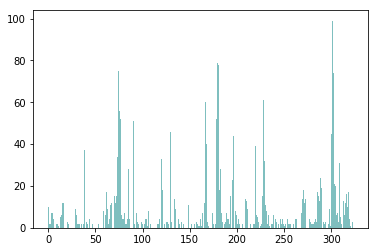

In [32]:
# 2.4
import matplotlib.pyplot as plt

timeStamp = re.findall("\d{1,3}\.\d{6}", skypeIRC)
timeStamp_fl = [float(a) for a in timeStamp]

n, bins, patches = plt.hist(timeStamp_fl, bins=round(timeStamp_fl[-1]), facecolor='teal', alpha=0.5)
plt.show()

### Problem 3: Retrieving Data from the Web
Problem 3 took me 3 hours.

In [12]:
from bs4 import BeautifulSoup
import requests

In [13]:
# 3.1
city_html = requests.get("https://en.wikipedia.org/wiki/Harbin").text
city_parsed = BeautifulSoup(city_html, 'html.parser')
ths = city_parsed.find_all("th")
for elem in ths:
    if re.findall("Climate data for", elem.get_text()) != []:
        th = elem
table_node = th.parent.parent
table_node
#BeautifulSoup(str(table_node.contents), "html.parser")

<table class="wikitable collapsible collapsed" style="width:90%; text-align:center; font-size:90%; line-height: 1.2em; margin:auto;">
<tr>
<th colspan="14">Climate data for Harbin (normals 1971–2000, extremes 1961–2000)</th>
</tr>
<tr>
<th scope="row">Month</th>
<th scope="col">Jan</th>
<th scope="col">Feb</th>
<th scope="col">Mar</th>
<th scope="col">Apr</th>
<th scope="col">May</th>
<th scope="col">Jun</th>
<th scope="col">Jul</th>
<th scope="col">Aug</th>
<th scope="col">Sep</th>
<th scope="col">Oct</th>
<th scope="col">Nov</th>
<th scope="col">Dec</th>
<th scope="col" style="border-left-width:medium">Year</th>
</tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °C (°F)</th>
<td style="background: #FDFDFF; color:#000000;">4.2<br/>
(39.6)</td>
<td style="background: #FFD9B4; color:#000000;">9.9<br/>
(49.8)</td>
<td style="background: #FF8F1F; color:#000000;">20.7<br/>
(69.3)</td>
<td style="background: #FF5300; color:#000000;">29.4<br/>
(84.9)</td

In [14]:
n_ch = 0
child_name = []
for elem in table_node.children:
    if elem.name != None:
        n_ch += 1
        child_name.append(elem.name)
n_ch

14

In [15]:
n_de = 0
desc_name = []
for elem in table_node.descendants:
    if elem.name != None:
        n_de += 1
        desc_name.append(elem.name)
n_de

258

In [16]:
children_num = [(a, child_name.count(a)) for a in set(child_name)]
children_num

[('tr', 14)]

In [17]:
desc_num = [(a,desc_name.count(a)) for a in set(desc_name)]
desc_num

[('th', 25),
 ('td', 132),
 ('sup', 2),
 ('br', 78),
 ('a', 6),
 ('tr', 14),
 ('span', 1)]

The tree has 14 children and all of them have the tag "tr". It has 258 descendants consisting of 78 "br" tag, 132 "td" tag, 6 "a" tag, 25 "th" tag, 14 "tr" tag, 2 "sup" tag and 1 "span" tag. 

In [18]:
# 3.2
from random import *

def retrieve_climate_table(url):
    try:
        city_html = urllib.request.urlopen(url).read()
        city_parsed = BeautifulSoup(city_html, 'html.parser')
        def climate_tag(tag):
            return re.match("Climate data for", tag.get_text())
        result = city_parsed.find_all(climate_tag)
        table_lst = []
        for elem in result:
            table = elem.parent
            while table.name != "table":
                table = table.parent
            table_lst.append(table)
                
        if len(table_lst) != 0:
            ind = randint(0, len(table_lst)-1)
            return(BeautifulSoup(str(table_lst[ind].contents),"html.parser"))
        else:
            return(None)
    except: 
        print("The URL is not retrieved successfully.")

In [19]:
retrieve_climate_table("https://en.wikipedia.org/wiki/Hyderabad")

['\n', <caption>Climate data for Hyderabad</caption>, '\n', <tr>
<th scope="row">Month</th>
<th scope="col">Jan</th>
<th scope="col">Feb</th>
<th scope="col">Mar</th>
<th scope="col">Apr</th>
<th scope="col">May</th>
<th scope="col">Jun</th>
<th scope="col">Jul</th>
<th scope="col">Aug</th>
<th scope="col">Sep</th>
<th scope="col">Oct</th>
<th scope="col">Nov</th>
<th scope="col">Dec</th>
<th scope="col" style="border-left-width:medium">Year</th>
</tr>, '\n', <tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °C (°F)</th>
<td style="background: #FF2600; color:#000000;">35.9<br/>
(96.6)</td>
<td style="background: #FF1000; color:#FFFFFF;">39.1<br/>
(102.4)</td>
<td style="background: #F50000; color:#FFFFFF;">42.2<br/>
(108)</td>
<td style="background: #E60000; color:#FFFFFF;">43.3<br/>
(109.9)</td>
<td style="background: #D50000; color:#FFFFFF;">44.5<br/>
(112.1)</td>
<td style="background: #C70000; color:#FFFFFF;">45.5<br/>
(113.9)</td>
<td style="backgr

In [20]:
# 3.3
def list_climate_table_row_names(url):
    
    table = retrieve_climate_table(url)
    
    if table == None:
        return(None)
    else:
        def find_row(tag):
            return tag.has_attr("scope")
        result = table.find_all(find_row)
        row_names_lst = []
        for elem in result:
            if elem["scope"] == "row":
                row_names_lst.append(elem.get_text())
        return(row_names_lst)
    

In [21]:
list_climate_table_row_names("https://en.wikipedia.org/wiki/Hyderabad")

['Month',
 'Record high °C (°F)',
 'Average high °C (°F)',
 'Daily mean °C (°F)',
 'Average low °C (°F)',
 'Record low °C (°F)',
 'Average rainfall mm (inches)',
 'Average rainy days (≥ 1.0 mm)',
 'Average relative humidity (%)',
 'Mean monthly sunshine hours']

### 3.4
We define a function which takes two arguments `url` and `row_name`. 
We will first use function `retrieve_climate_table(url)`, to find the climate data table, `climate_table`. Then we will use the function `list_climate_table_row_names(url)` to find the list of row names of the data, `row_names` and use `row_names` to check whether `row_name` is in the list. If the table does not exist or it does not have such row name, the funciton will return `None`. 
If the table exists and has that row name, we will find the tag for which `tag.has_attr("scope")` and `tag.get_text() == row_name`. After finding that tag, we will return to its parent node, `parent_node` and then return a list of children of `parent_node`, `child_lst`. We apply `get_text()` to each child in `child_lst` to get `data_lst`. Since row name is always the first child in `child_lst`, we will remove the first elemenet of `data_lst` and the rest of it are the data from the row of the table.

### Problem 4: Relational Databases and SQL
Problem 4 took me 2 hours.

In [22]:
# 4.1 & 4.2
import sqlite3
chinook = sqlite3.connect('Chinook_Sqlite.sqlite')
c = chinook.cursor()

tables = c.execute("SELECT name FROM sqlite_master WHERE type='table';")
n_tables = 0
for elem in tables:
    n_tables += 1
    print(elem[0])

Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack
Track


In [23]:
n_tables

11

There are 11 tables in the database and the names of the tables are listed above. 

In [24]:
# 4.3
def list_album_ids_by_letter(s):
    albums = c.execute("SELECT AlbumId FROM Album WHERE Title LIKE '" + s.upper() + "%'")
    pk_album_lst = []
    for r in albums:
        pk_album_lst.append(r[0])
    return(pk_album_lst)

In [25]:
album_C = list_album_ids_by_letter("C")
len(album_C)

23

In [26]:
album_M = list_album_ids_by_letter("M")
len(album_M)

25

There are 23 albums in the database with titles starting with "C" and 25 albums in the database with titles starting with "M".

In [27]:
# 4.4
def list_song_ids_by_album_letter(s):
    songs = c.execute("SELECT TrackId FROM Album a INNER JOIN Track t on a.AlbumId = t.AlbumId WHERE Title LIKE '" 
                      + s.upper() + "%'")
    pk_song_lst = []
    for r in songs:
        pk_song_lst.append(r[0])
    return(pk_song_lst)

In [28]:
len(list_song_ids_by_album_letter("n"))

74

In [29]:
len(list_song_ids_by_album_letter("d"))

106

There are 74 songs in all the albums whose titles begin with the letter "N" and 106 songs whose titles begin with the letter "D".

In [30]:
# 4.5
def total_cost_by_album_letter(s):
    price = c.execute("SELECT sum(UnitPrice) FROM Album a INNER JOIN Track t on a.AlbumId = t.AlbumId WHERE Title LIKE '" 
                      + s.upper() + "%'")
    for r in price:
        return(r[0])

In [31]:
total_cost_by_album_letter("L")

350.3900000000009

It would cost 350.39 to buy all tracks in the database whos albums begin with "L".